In [ ]:
# image segmentation

## 1. Thresholding

In [ ]:
# 가장 기본, 밝기값만 가지고 분할, 이것만 가지고 하는 건 드물다. 
# 완전 흑백 영상이 아닌 이상
# 보통 전처리로 사용해서 대략적인 영역을 지정할 때 사용. 그래서 1차 분할 시 사용.
# !pip install scikit-image

ret= 155.0


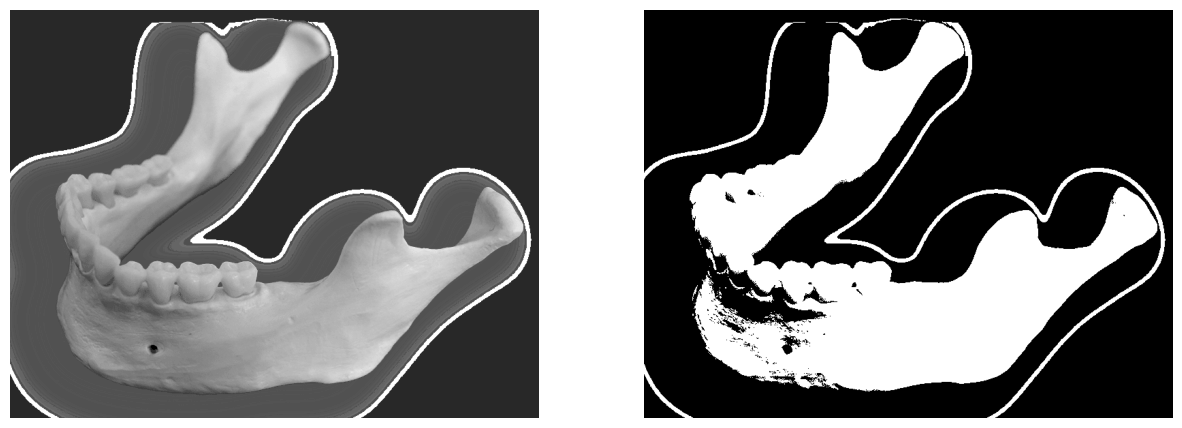

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import filters

path = '/Users/werther/image/'
src = cv2.imread(path + 'mandible.png', cv2.IMREAD_GRAYSCALE)
ret, dst = cv2.threshold(src, 128, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
print('ret=', ret)

plt.figure(figsize=(15,15))

plt.subplot(1,2,1)
plt.axis('off')
plt.imshow(src, cmap='gray')

plt.subplot(1,2,2)
plt.axis('off')
plt.imshow(dst, cmap='gray')

[116 170]
ret2= 170.0


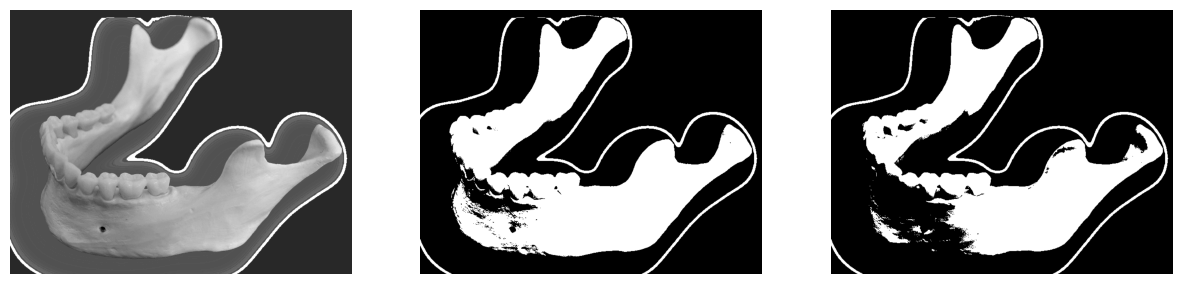

In [3]:
thresh = filters.threshold_multiotsu(src, classes=3)
print(thresh)
ret2, dst2 = cv2.threshold(src, thresh[1], 255, cv2.THRESH_BINARY)
print('ret2=', ret2)

plt.figure(figsize=(15,15))

plt.subplot(1,3,1)
plt.axis('off')
plt.imshow(src, cmap='gray')

plt.subplot(1,3,2)
plt.axis('off')
plt.imshow(dst, cmap='gray')

plt.subplot(1,3,3)
plt.axis('off')
plt.imshow(dst2, cmap='gray')

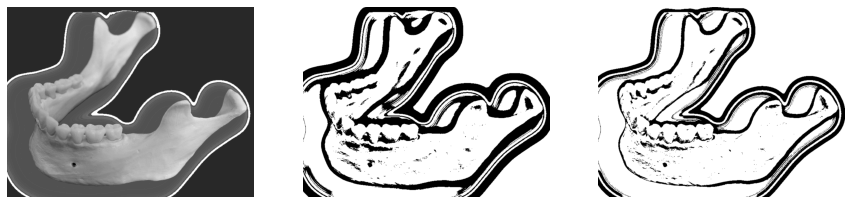

In [3]:
dst3 = cv2.adaptiveThreshold(src, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 51, 7)
dst4 = cv2.adaptiveThreshold(src, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 51, 7)

plt.figure(figsize=(15,15))

plt.subplot(1,3,1)
plt.axis('off')
plt.imshow(src, cmap='gray')

plt.subplot(1,3,2)
plt.axis('off')
plt.imshow(dst3, cmap='gray')

plt.subplot(1,3,3)
plt.axis('off')
plt.imshow(dst4, cmap='gray')

## 2. Thresholding in Color

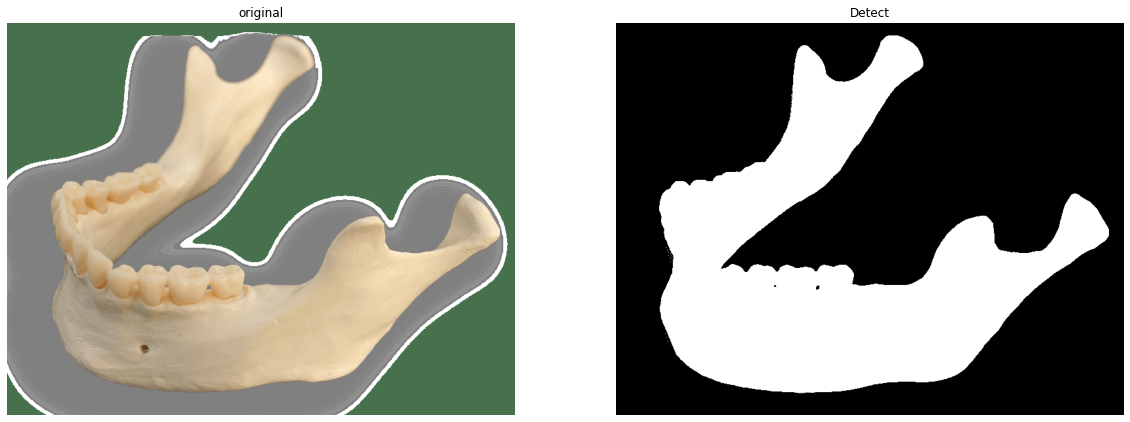

In [4]:
src = cv2.imread(path + 'mandible.png')
hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)
lower = np.array([0,10,80], dtype = 'uint8')
upper = np.array([30, 255, 255], dtype = 'uint8')
dst = cv2.inRange(hsv, lower, upper)

src = cv2.cvtColor(src, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(20,20))
image1 = plt.subplot(1,2,1)
image1.set_title('original')
plt.axis('off')
plt.imshow(src, cmap='gray')

image2 = plt.subplot(1,2,2)
image2.set_title('Detect')
plt.axis('off')
plt.imshow(dst, cmap='gray')

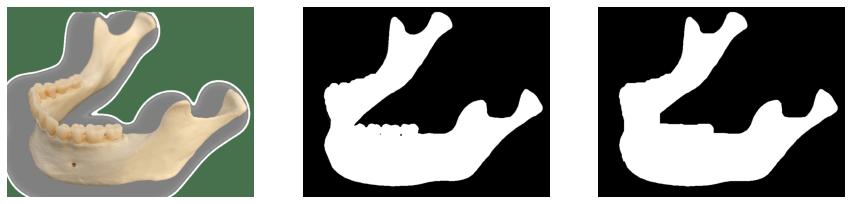

In [5]:
kernel = cv2.getStructuringElement(shape=cv2.MORPH_RECT, ksize=(7,7))
#erode = cv2.erode(src, kernel, iterations = 3)
#dilate = cv2.dilate(src, kernel, iterations = 3)
mor_close = cv2.morphologyEx(dst, cv2.MORPH_CLOSE, kernel, iterations = 5)

plt.figure(figsize=(15,15))

plt.subplot(1,3,1)
plt.axis('off')
plt.imshow(src, cmap='gray')

plt.subplot(1,3,2)
plt.axis('off')
plt.imshow(dst, cmap='gray')

plt.subplot(1,3,3)
plt.axis('off')
plt.imshow(mor_close, cmap='gray')

In [6]:
def onChange(pos):
    global img, mask, hsv
    l = cv2.getTrackbarPos('V-lower', 'img')
    u = cv2.getTrackbarPos('V-upper', 'img')
    lower = np.array([0,0,l], dtype = 'uint8')
    upper = np.array([255, 255, u], dtype = 'uint8')
    mask = cv2.inRange(hsv, lower, upper)
    cv2.imshow('mask', mask)

In [7]:
img = cv2.imread(path + 'mandible.png')
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
mask = np.zeros_like(img, dtype=np.uint8)

cv2.imshow('img', img)
cv2.imshow('mask', mask)

# trackbar 생성
cv2.createTrackbar('V-lower', 'img', 0, 255, onChange)
cv2.createTrackbar('V-upper', 'img', 0, 255, onChange)

# trackbar 위치 초기화
cv2.setTrackbarPos('V-lower', 'img', 0)
cv2.setTrackbarPos('V-upper', 'img', 0)

cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

-1